In [1]:
import numpy as np
import matplotlib.pyplot as plt


(-16.0, 0.41649882566469076)

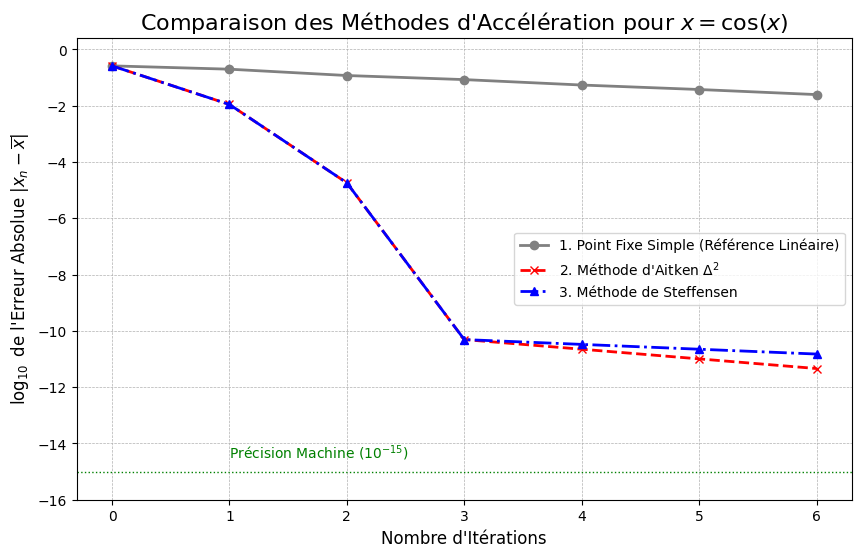

In [2]:

    
# Racine exacte de x = cos(x)
ROOT = 0.7390851332151606

# Fonction d'itération (g(x) = cos(x))
def g(x):
    return np.cos(x)

# Point initial et nombre d'itérations
MAX_ITER = 6
X0 = 1.0

# --- 1. Méthodes Numériques ---

# A. Point Fixe Simple (Linéaire - Référence)
def simple_fixed_point(x0, max_iter):
    x = x0
    errors = [abs(x - ROOT)]
    for _ in range(max_iter):
        x = g(x)
        errors.append(abs(x - ROOT))
    return errors

# B. Méthode d'Aitken Delta Carré (Implémentée itérativement)
def aitken_method(x0, max_iter):
    errors = [abs(x0 - ROOT)]
    x = x0

    for _ in range(max_iter):

        # 1. Générer les 3 itérés consécutifs de la suite lente g(x)
        x_n = x
        x_n_plus_1 = g(x_n)
        x_n_plus_2 = g(x_n_plus_1)

        # 2. Appliquer la correction Aitken
        numerator = (x_n_plus_1 - x_n)**2
        denominator = x_n_plus_2 - 2 * x_n_plus_1 + x_n

        if np.isclose(denominator, 0):
            # Si le dénominateur est nul, on utilise le dernier point fixe
            x_next = x_n_plus_2
        else:
            # Aitken: le nouvel itéré accéléré
            x_next = x_n - numerator / denominator

        errors.append(abs(x_next - ROOT))
        x = x_next

    return errors

# C. Méthode de Steffensen (Quadratique - Dérivée-free)
def steffensen_method(x0, max_iter):
    x = x0
    errors = [abs(x - ROOT)]

    for _ in range(max_iter):

        # Application directe de la formule de Steffensen
        g_x = g(x)
        g_g_x = g(g_x)

        numerator = (g_x - x)**2
        denominator = g_g_x - 2 * g_x + x

        if np.isclose(denominator, 0):
            # En cas de dénominateur nul, on revient à la simple itération
            x_next = g_x
        else:
            # Steffensen: le nouvel itéré accéléré
            x_next = x - numerator / denominator

        errors.append(abs(x_next - ROOT))
        x = x_next

    return errors

# --- 2. Exécution et Tracé ---

# Calcul des erreurs
errors_simple = simple_fixed_point(X0, MAX_ITER)
errors_aitken = aitken_method(X0, MAX_ITER)
errors_steffensen = steffensen_method(X0, MAX_ITER)

# Configuration du graphique
plt.figure(figsize=(10, 6))

# Tracé des résultats
plt.plot(range(len(errors_simple)), np.log10(errors_simple),
         marker='o', linestyle='-', color='gray', label='1. Point Fixe Simple (Référence Linéaire)', linewidth=2)
plt.plot(range(len(errors_aitken)), np.log10(errors_aitken),
         marker='x', linestyle='--', color='red', label='2. Méthode d\'Aitken $\\Delta^2$', linewidth=2)
plt.plot(range(len(errors_steffensen)), np.log10(errors_steffensen),
         marker='^', linestyle='-.', color='blue', label='3. Méthode de Steffensen', linewidth=2)

# Annotation pour la lecture
plt.axhline(y=np.log10(1e-15), color='green', linestyle=':', linewidth=1)
plt.text(1, np.log10(1e-15) + 0.5, "Précision Machine ($10^{-15}$)", color='green')

# Labels et titre
plt.title("Comparaison des Méthodes d'Accélération pour $x = \cos(x)$", fontsize=16)
plt.xlabel("Nombre d'Itérations", fontsize=12)
plt.ylabel("$\\log_{10}$ de l'Erreur Absolue $|x_n - \\overline{x}|$", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.ylim(-16, np.log10(errors_simple[0])+1) # Ajustement pour la lisibilité

| Courbe | Méthode | Ordre de Convergence | Caractéristique |
| :--- | :--- | :--- | :--- |
| Grise (1) | Point Fixe Simple | Linéaire (p=1) | Référence. La plus lente. |
| Rouge (2) | Méthode d'Aitken Δ2 | Quadratique (p=2) | Accélération de séquence générique. |
| Bleue (3) | Méthode de Steffensen | Quadratique (p=2) | Version itérative sans dérivée. |